## The seventh Lab-assignment (03/31/2022, 50 points in total)

The purpose of this exercise is to build several regression models based on real-world datasets. 

### Question 1 (25 points) Build a regession model to predict the change in price of the stock overtime. It can either be linear regression or non-linear regression. You can download the dataset from here: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/portfolio_data.csv. The implementation of the LSTM on this same dataset was posted here as an reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
### You code here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from datetime import datetime

file_path = "portfolio_data.csv"

df = pd.read_csv(file_path)


df['Date'] = pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal)


df.head()

,Date,AMZN,DPZ,BTC,NFLX
0,734989,248.229996,51.190983,106.250000,30.415714
1,734990,252.550003,51.987320,98.099998,30.641428
2,734991,258.049988,52.446388,112.900002,30.492857
3,734994,255.720001,53.205257,109.599998,30.098572
4,734995,257.730011,54.151505,113.199997,29.464285


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1520 non-null   int64  
 1   AMZN    1520 non-null   float64
 2   DPZ     1520 non-null   float64
 3   BTC     1520 non-null   float64
 4   NFLX    1520 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 59.5 KB


In [20]:
df.describe()

,Date,AMZN,DPZ,BTC,NFLX
count,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000
mean,736089.766447,821.541810,146.771695,2421.465669,147.668273
std,636.650355,518.442653,72.192287,3310.894199,107.641486
min,734989.000000,248.229996,51.190983,69.660004,29.464285
25%,735536.750000,364.360001,84.993593,340.904999,62.851071
50%,736089.500000,686.459992,127.168053,625.304993,104.000000
75%,736639.250000,1121.287536,202.454994,3874.912415,192.207496
max,737193.000000,2039.510010,298.635986,18972.320310,418.970001


<AxesSubplot:>

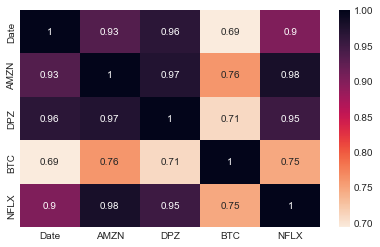

In [21]:
correlations = df.corr()
sns.heatmap(correlations, annot=True, cmap="rocket_r")

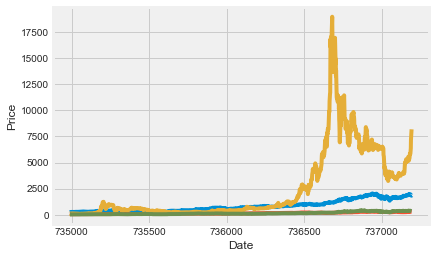

In [22]:
# examine stock price for AMZN
x = df['Date']
y1 = df['AMZN']
y2 = df['DPZ']
y3 = df['BTC']
y4 = df['NFLX']

#fig, ax = plt.subplots()
#plt.subplot(2,2,1)
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.xlabel('Date')
plt.ylabel('Price')



plt.show()

In [23]:

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.25, random_state=42, shuffle=True)

train_df = train
test_df = test

In [24]:
from sklearn import neighbors
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor

cols = ['Date', 'AMZN', 'DPZ', 'BTC']

#model = DecisionTreeRegressor()
#model = LinearRegression()
model = KNeighborsRegressor(n_neighbors = 5)
#model = LinearSVR()
#model = RandomForestRegressor(n_estimators = 10)

In [25]:
# fit the model to the split training data
model.fit(train_df[cols], train_df['NFLX'])

# predict on the split test data
pred_count = model.predict(test_df[cols])

# score the model on the split test data
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(test_df['NFLX'],pred_count))
print("RMS error:",rms)

RMS error: 12.276604426733975


### Question 2 (25 points) The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets. Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset. The dataset can be downloaded here: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/Twitter%20Sentiment%20Analysis. Please build a logistic regression model for the classification, evaluation metrics include accuracy, precision, recall, and F-1 score need to be reported. 

In [26]:
### You code here:

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

train_file = "train.csv"
train_df = pd.read_csv(train_file)
train_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [42]:
#
train_df.head(10)

,id,label,tweet,normalized_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit use cause offer wheelchair ...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation
5,6,0,[2/2] huge fan fare and big talking before the...,huge fan fare big talking leave chaos pay disp...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,next school year year exam think school exam h...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,love land allin cavs champion cleveland clevel...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome gr


In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                31962 non-null  int64 
 1   label             31962 non-null  int64 
 2   tweet             31962 non-null  object
 3   normalized_tweet  31962 non-null  object
dtypes: int64(2), object(2)
memory usage: 998.9+ KB


<AxesSubplot:xlabel='label', ylabel='count'>

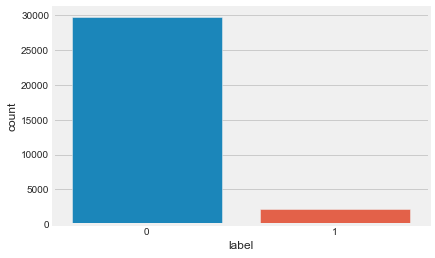

In [28]:
sns.countplot(x= 'label',data = train_df)

In [29]:
import re
import nltk
nltk.download('omw-1.4')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemma = WordNetLemmatizer()

def normalization(tweet):
    tweets = " ".join(filter(lambda x: x[0]!= '@' , tweet.split()))
    tweets = re.sub('[^a-zA-Z]', ' ', tweets)
    tweets = tweets.lower()
    tweets = tweets.split()
    tweets = [word for word in tweets if not word in set(stopwords.words('english'))]
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = " ".join(tweets)
    return tweets

train_df['normalized_tweet'] = train_df.tweet.apply(normalization)
train_df

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/austinbelknap/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/austinbelknap/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/austinbelknap/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,id,label,tweet,normalized_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit use cause offer wheelchair ...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz youuu
31958,31959,0,to see nina turner on the airwaves trying to...,see nina turner airwave trying wrap mantle gen...
31959,31960,0,listening to sad songs on a monday morning otw...,listening sad song monday morning otw work sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised calgary wso condemns act


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

len(train_df)
corpus = []
for i in range(0,31962):
    corpus.append(train_df['normalized_tweet'][i])

cv = CountVectorizer(stop_words=stopwords.words('english'))
cv.fit(corpus)

CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report, f1_score

X = cv.transform(corpus).toarray()
y = train_df.iloc[:,1].values


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


#classifier1 = LogisticRegression(C=10)
#classifier1.fit(X_train, y_train)
"""
y_pred = classifier1.predict(X_test)
y_prob = classifier1.predict_proba(X_test)


print(f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
"""

'\ny_pred = classifier1.predict(X_test)\ny_prob = classifier1.predict_proba(X_test)\n\n\nprint(f1_score(y_test, y_pred))\nprint(classification_report(y_test, y_pred))\nprint(confusion_matrix(y_test, y_pred))\n'

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
classifier1 = LogisticRegression()
classifier1.fit(X_train, y_train)

LogisticRegression()

In [34]:
y_pred = classifier1.predict(X_test)
y_prob = classifier1.predict_proba(X_test)

In [35]:
print(f1_score(y_test, y_pred))
#print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))

0.6267902274641954


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      9806
           1       0.84      0.50      0.63       742

    accuracy                           0.96     10548
   macro avg       0.90      0.75      0.80     10548
weighted avg       0.95      0.96      0.95     10548



In [37]:
print(confusion_matrix(y_test, y_pred))

[[9733   73]
 [ 370  372]]
